In [2]:
#importing libraries
import numpy as np
import pandas as pd

In [3]:
#loading data
df=pd.read_csv('McDonalds Case Study/mcdonalds.csv')

In [4]:
#Exploring data
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [7]:
#Checking for missing values
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

Here the features 'Like','Age' are numerical variables,rest of the variables are categorical of which,'VisitFrequency' is a muticlass feature and 'Gender' is a binary feature.The rest of the categorical variables are of Yes/No type 
No presence of missing values found.

In [12]:
#value counts for each numerical features
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [13]:
df['Age'].value_counts()

55    53
60    38
37    37
59    36
57    36
52    36
58    35
36    35
49    34
62    34
50    34
32    33
44    32
56    32
64    32
53    31
26    31
24    30
35    30
51    30
47    30
42    30
23    30
39    29
29    28
34    28
30    28
38    27
40    27
31    27
25    26
33    26
61    26
67    26
48    26
43    25
27    25
63    25
54    24
41    23
22    23
65    23
45    22
20    21
46    19
28    18
66    17
21    16
18    16
70    15
69    14
68    13
19    10
71     1
Name: Age, dtype: int64

In [14]:
#value counts for 'VisitFrequency'
df['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [15]:
#value counts for 'Gender'
df['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

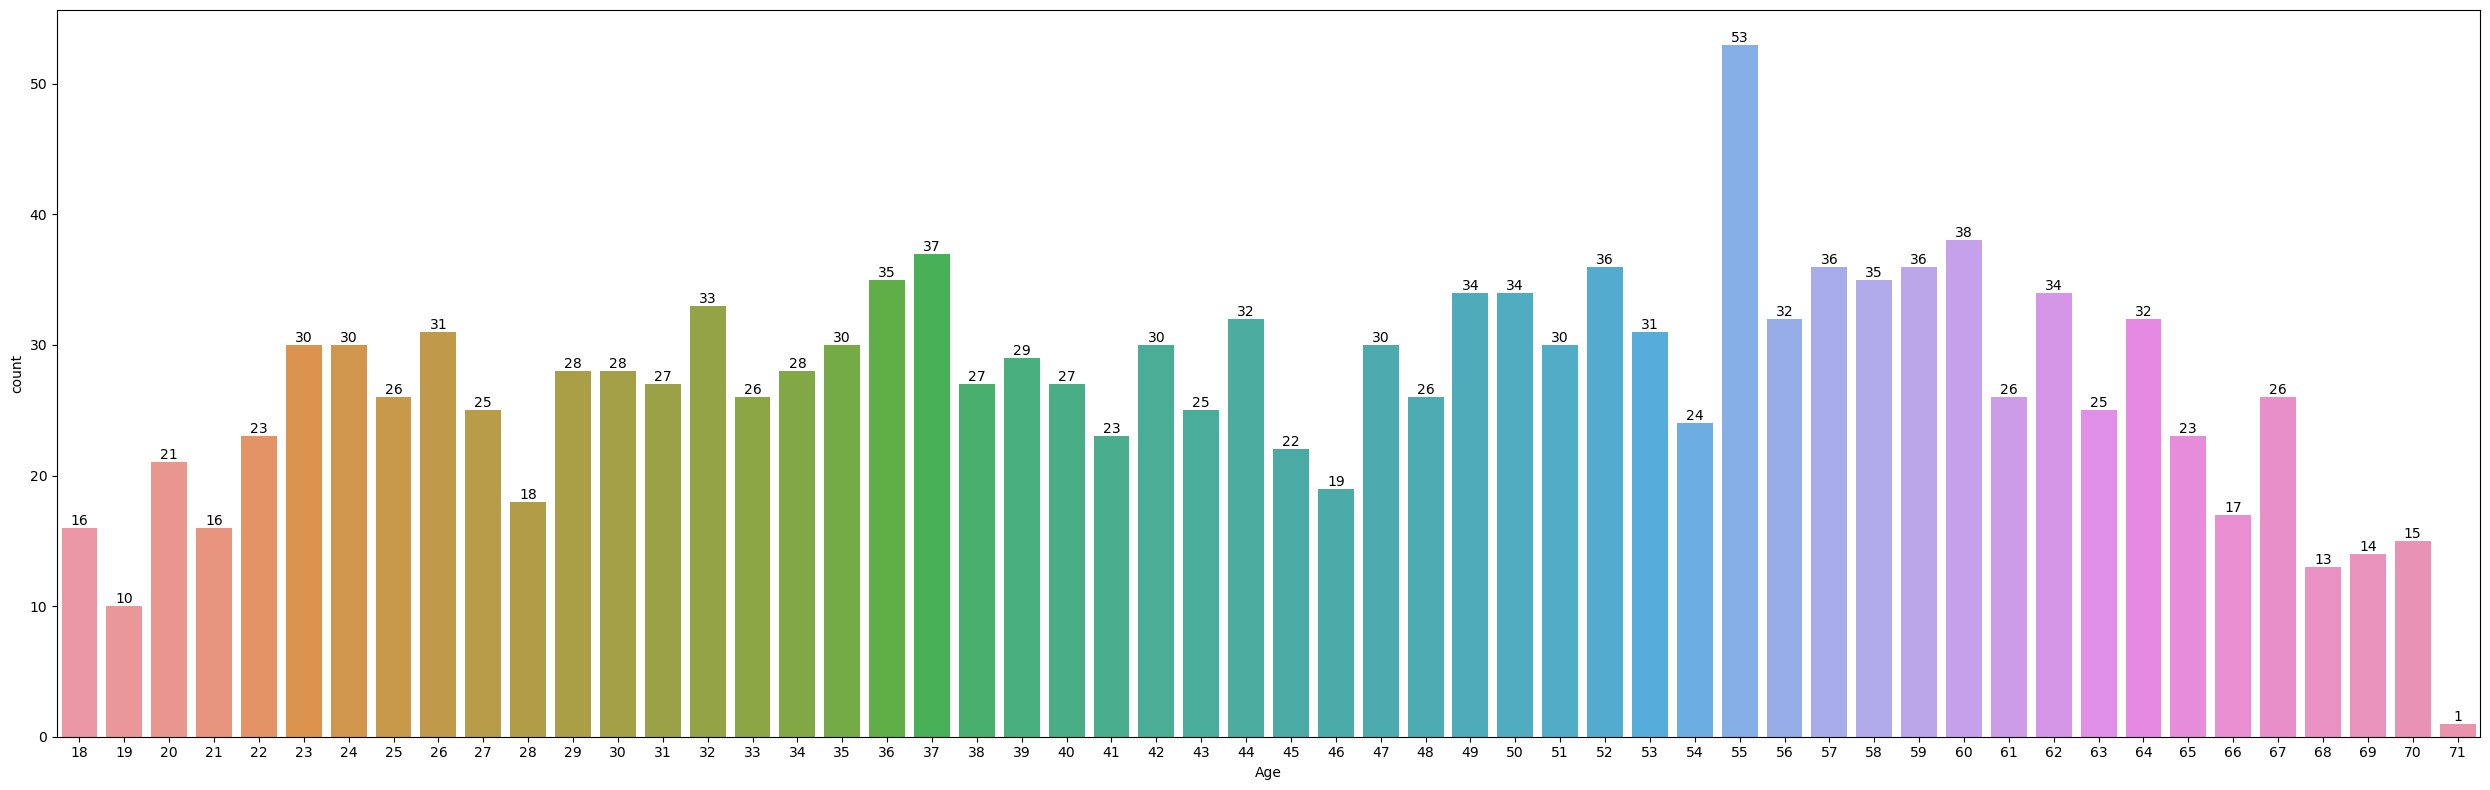

In [44]:
plt.rcParams['figure.figsize']=(25,8)
fig1=sns.countplot(x=df['Age'])
fig1.bar_label(fig1.containers[0])
plt.tight_layout()

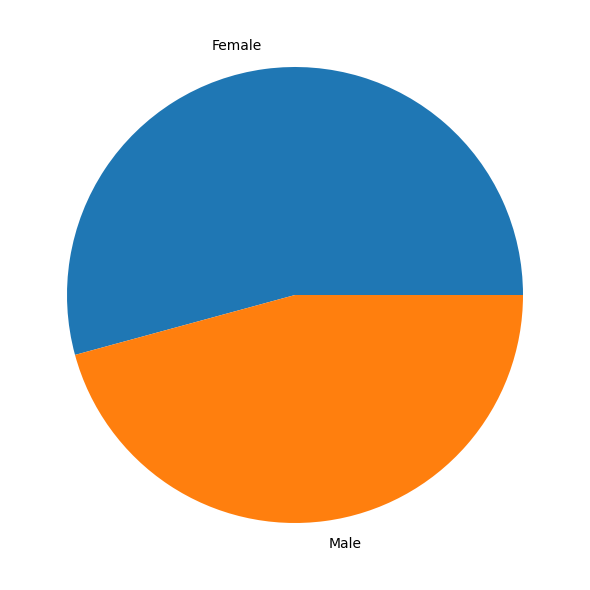

In [52]:
plt.rcParams['figure.figsize']=(6,6)
labels=['Female','Male']
size=df['Gender'].value_counts()
fig2=plt.pie(size,labels=labels)
plt.tight_layout()

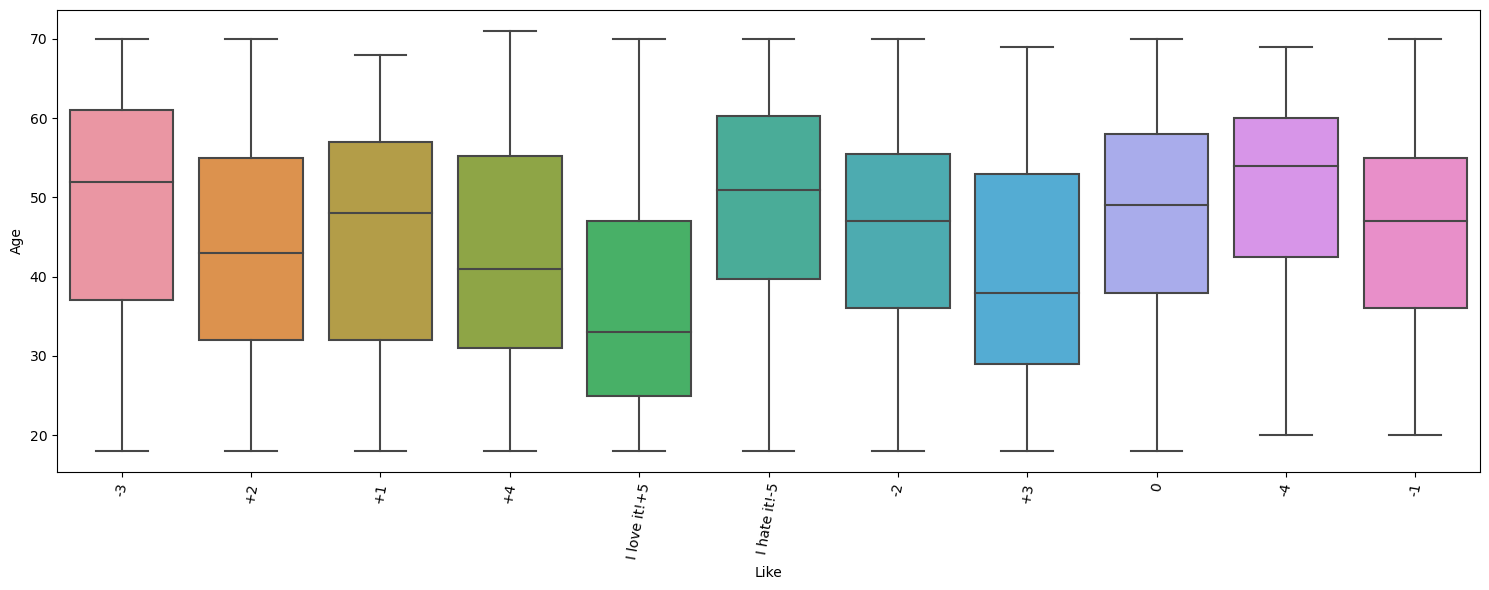

In [56]:
plt.rcParams['figure.figsize']=(15,6)
fig3=sns.boxplot(x='Like',y='Age',data=df,orient='v')
fig3.set_xticklabels(fig3.get_xticklabels(),rotation=80)
plt.tight_layout()

In [59]:
#data preprocessing
df1=df.drop(labels=['Like','Age','VisitFrequency','Gender'],axis=1)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_enc=df1.apply(le.fit_transform)
df_enc.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [72]:
#principal component analysis
from sklearn.decomposition import PCA
pca=PCA(n_components=11)
df_pca=pca.fit_transform(df_enc)
df_pcacomp=pca.components_

In [82]:
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
df1_pca = pd.DataFrame.from_dict(dict(zip(pc_list,df_pcacomp)))
df1_pca['feature'] = df_enc.columns.values
df1_pca= df1_pca.set_index('feature')
df1_pca.head(11)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
feature,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


<AxesSubplot:ylabel='feature'>

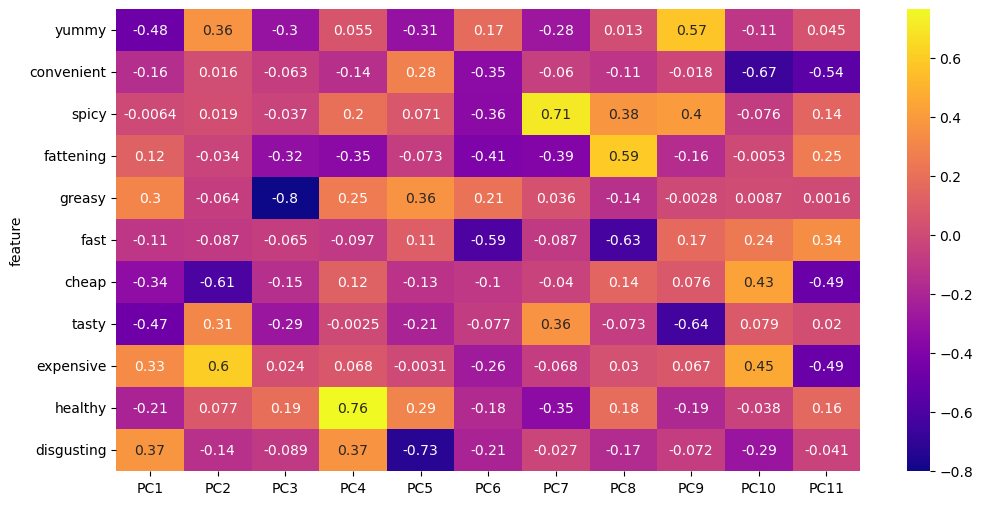

In [83]:
plt.rcParams['figure.figsize']=(12,6)
sns.heatmap(df1_pca,cmap='plasma',annot=True)

In [93]:
#Extracting segments using k-means clustering algorithm
#finding k value
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,12):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df_enc)
    wcss.append(kmeans.inertia_)

C:\Users\malav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

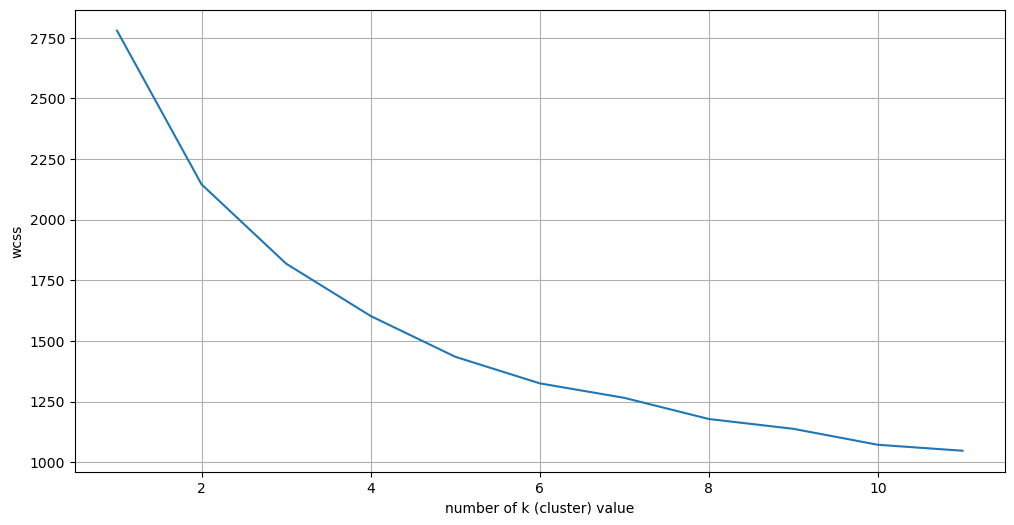

In [96]:
plt.rcParams['figure.figsize']=(12,6)
plt.plot(range(1,12),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.grid()
plt.tight_layout